<a href="https://colab.research.google.com/github/ThuanPhat2709/AI-FINAL_TERM/blob/main/Face_rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Rotation


##Import Library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,MaxPooling2D,Conv2D
from keras.backend import conv2d
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import cv2
import os
import tensorflow as  tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping

## Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid=ImageDataGenerator(rescale=1./255,validation_split=0.3)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/FACE1/Train',
                                    target_size = (150,150),
                                    batch_size = 5,
                                    class_mode = 'categorical')
valid_set=valid.flow_from_directory('/content/drive/MyDrive/FACE1/Valid',
                                    target_size = (150,150),
                                    batch_size = 5,
                                    class_mode = 'categorical')

Found 970 images belonging to 11 classes.
Found 421 images belonging to 11 classes.


## Create Model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same",input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(512,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#ANN
model.add(Flatten())
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.add(Dropout(0.2))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_65 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_67 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [ ]:
opt=SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_set,epochs=400,batch_size=12,verbose=1, validation_data=valid_set)

Epoch 1/400
194/194 [==============================] - 10s 45ms/step - loss: 6.0726 - accuracy: 0.1598 - val_loss: 2.3203 - val_accuracy: 0.1615
Epoch 2/400
194/194 [==============================] - 9s 45ms/step - loss: 6.1233 - accuracy: 0.1753 - val_loss: 2.3024 - val_accuracy: 0.1615
Epoch 3/400
194/194 [==============================] - 9s 45ms/step - loss: 6.1524 - accuracy: 0.1670 - val_loss: 2.3004 - val_accuracy: 0.1615
Epoch 4/400
194/194 [==============================] - 9s 46ms/step - loss: 6.1234 - accuracy: 0.1629 - val_loss: 2.2889 - val_accuracy: 0.1615
Epoch 5/400
194/194 [==============================] - 9s 45ms/step - loss: 6.2612 - accuracy: 0.1722 - val_loss: 2.2756 - val_accuracy: 0.1615
Epoch 6/400
194/194 [==============================] - 9s 46ms/step - loss: 6.2265 - accuracy: 0.1711 - val_loss: 2.2737 - val_accuracy: 0.1615
Epoch 7/400
194/194 [==============================] - 9s 46ms/step - loss: 5.9414 - accuracy: 0.1938 - val_loss: 2.2327 - val_accuracy

## Create Lable

In [ ]:
train_set.class_indices

{'Chính giữa': 0,
 'Quayphải(0,-60)': 1,
 'Quayphải(0,-90)': 2,
 'Quaytrái(0,+60)': 3,
 'Quaytrái(0,+90)': 4,
 'quay lên(90,0)': 5,
 'quay phải hướng lên(+60,-90)': 6,
 'quay phải hướng xuống(-60,-90)': 7,
 'quay trái hướng lên(+60,+90)': 8,
 'quay trái hướng xuống(-60,+90)': 9,
 'quay xuống(-90,0)': 10}

In [ ]:
Names={0: 'Front',
 1: 'Turn Right 60°',
 2: 'Turn Right 90°',
 3: 'Turn Left 60°',
 4: 'Turn Left 90°',
 5: 'Turn up',
 6: 'Turnright 60°up',
 7: 'Turnright 60°down',
 8: 'Turnleft 60°up',
 9: 'Turnleft 60°down',
 10:'Turn down'}


## Test Model

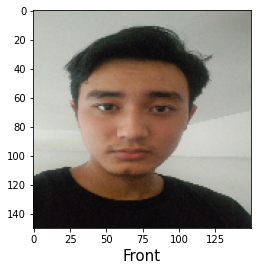

In [ ]:
img=load_img('/content/aa.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

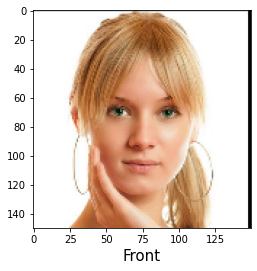

In [ ]:
img=load_img('/content/image02344.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

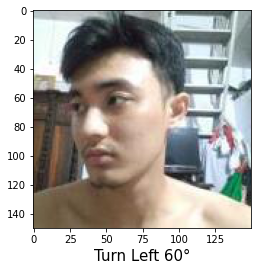

In [ ]:
img=load_img('/content/sff.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

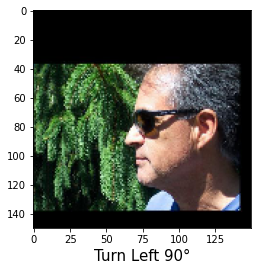

In [ ]:
img=load_img('/content/image02420.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

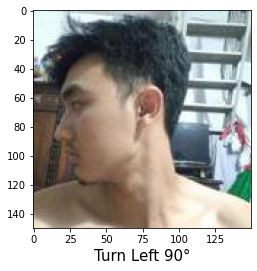

In [ ]:
img=load_img('/content/tttt.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

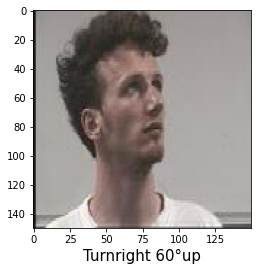

In [ ]:
img=load_img('/content/ee.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

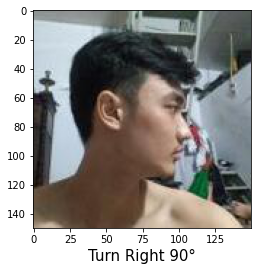

In [ ]:
img=load_img('/content/asdad.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

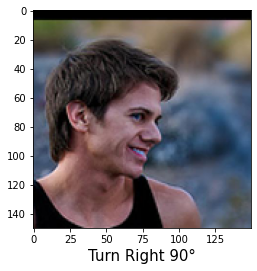

In [ ]:
img=load_img('/content/image02016.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

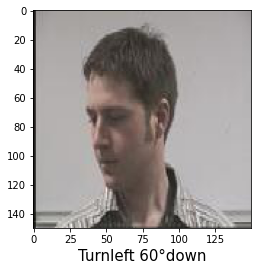

In [ ]:
img=load_img('/content/weq.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

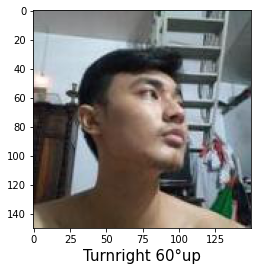

In [ ]:
img=load_img('/content/abc.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

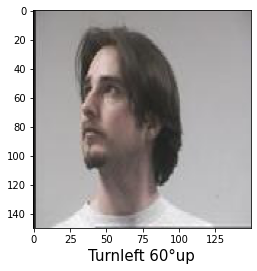

In [ ]:
img=load_img('/content/www.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

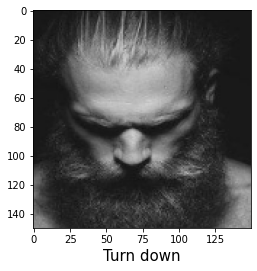

In [ ]:
img=load_img('/content/rr.PNG',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

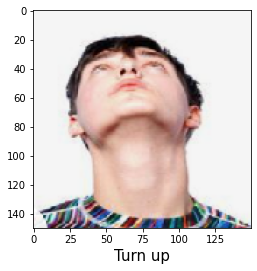

In [ ]:
img=load_img('/content/12.PNG',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

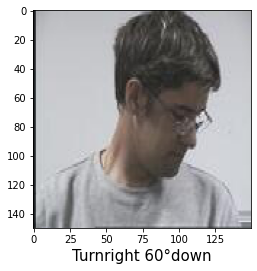

In [ ]:
img=load_img('/content/rqrqw.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

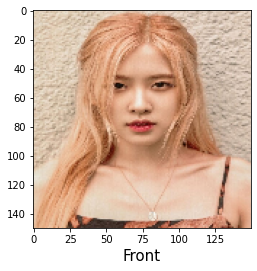

In [ ]:
img=load_img('/content/rere.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

## Accuracy

In [ ]:
score=model.evaluate(valid_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

85/85 [==============================] - 2s 20ms/step - loss: 0.9518 - accuracy: 0.7363
Sai số:  0.9517837762832642
Độ chính xác:  0.7363420724868774


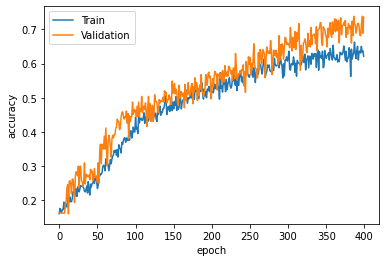

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

## Save Model

In [ ]:
model.save('modelfa73.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/modelfa73.h5')

In [ ]:
score=model.evaluate(valid_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

85/85 [==============================] - 99s 1s/step - loss: 0.9518 - accuracy: 0.7363
Sai số:  0.9517835974693298
Độ chính xác:  0.7363420724868774
